<a href="https://colab.research.google.com/github/merttguney/AI_106/blob/main/10.Hafta/AI106_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
veriler = pd.read_csv("masraflar.csv")
veriler

,gün,harcama
0,1,105.202483
1,1,100.092284
2,1,101.334453
3,1,105.322253
4,2,107.028516
...,...,...
95,28,244.718525
96,29,244.300731
97,29,240.680163
98,29,245.123951


In [ ]:
x = veriler["gün"]
y = veriler["harcama"]

In [ ]:
coefficients = np.polyfit(x, y, 2)

In [ ]:
coefficients

array([8.43869264e-02, 2.61573379e+00, 9.73140111e+01])

In [ ]:
# f(x) = 2x² + 3x + 5
polynomial = np.poly1d(coefficients)

In [ ]:
y_pred = polynomial(x)

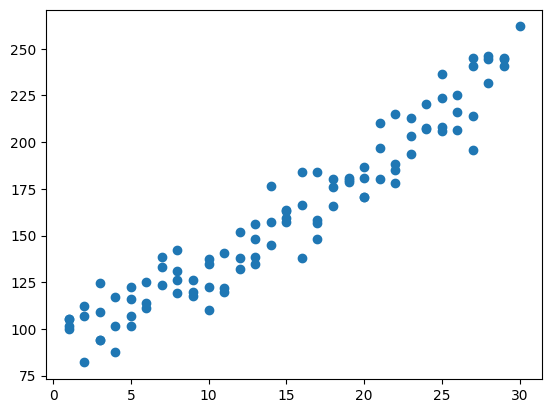

In [ ]:
plt.scatter(x, y, label = 'Gerçek Veriler')
plt.plot(x, y_pred, color = 'r', label = '2.Dereceden Polinom') # X'ler aynı, Y'ler de bizim tahmin değerlerimiz.

In [ ]:
gun = veriler.iloc[:, 0:1] # Gün için 0 ile 1 indexini al, 0 dahil ve 1 dahil değil. (Index Location)
gun

,gün
0,1
1,1
2,1
3,1
4,2
...,...
95,28
96,29
97,29
98,29


In [ ]:
Harcama = veriler.iloc[:, 1:2]
Harcama

,harcama
0,105.202483
1,100.092284
2,101.334453
3,105.322253
4,107.028516
...,...
95,244.718525
96,244.300731
97,240.680163
98,245.123951


In [ ]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()

LModel = linReg.fit(gun, Harcama)

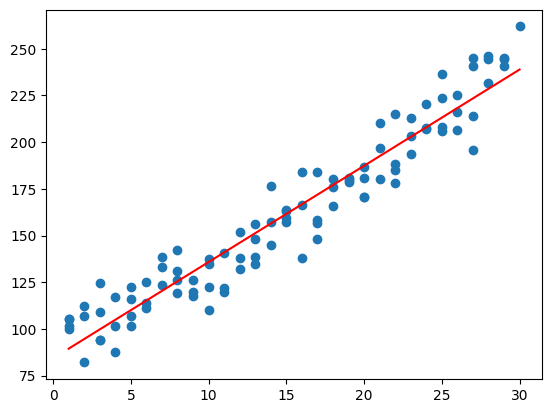

In [ ]:
plt.scatter(gun, Harcama)
plt.plot(gun, LModel.predict(gun), color = "red")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
LModel.score(gun, Harcama)

0.9230686703268497

In [ ]:
MAE = mean_absolute_error(y, LModel.predict(gun))
print(MAE)
MSE = mean_squared_error(y, LModel.predict(gun))
print(MSE)
RMSE = np.sqrt(MSE)
print(RMSE)

10.355467888640376
158.40064446527427
12.585731781079488


In [ ]:
 from sklearn.preprocessing import PolynomialFeatures# Polynomial özellikler eklememize yarar.
polReg = PolynomialFeatures(degree = 2, include_bias=False)

In [ ]:
gun_pol = polReg.fit_transform(gun)
gun_pol.shape

(100, 2)

In [ ]:
gun_pol

array([[  1.,   1.],
       [  1.,   1.],
       [  1.,   1.],
       [  1.,   1.],
       [  2.,   4.],
       [  2.,   4.],
       [  2.,   4.],
       [  3.,   9.],
       [  3.,   9.],
       [  3.,   9.],
       [  3.,   9.],
       [  4.,  16.],
       [  4.,  16.],
       [  4.,  16.],
       [  5.,  25.],
       [  5.,  25.],
       [  5.,  25.],
       [  5.,  25.],
       [  6.,  36.],
       [  6.,  36.],
       [  6.,  36.],
       [  7.,  49.],
       [  7.,  49.],
       [  7.,  49.],
       [  8.,  64.],
       [  8.,  64.],
       [  8.,  64.],
       [  8.,  64.],
       [  9.,  81.],
       [  9.,  81.],
       [  9.,  81.],
       [ 10., 100.],
       [ 10., 100.],
       [ 10., 100.],
       [ 10., 100.],
       [ 11., 121.],
       [ 11., 121.],
       [ 11., 121.],
       [ 12., 144.],
       [ 12., 144.],
       [ 12., 144.],
       [ 13., 169.],
       [ 13., 169.],
       [ 13., 169.],
       [ 13., 169.],
       [ 14., 196.],
       [ 14., 196.],
       [ 14.,

In [ ]:
linReg2 = LinearRegression()
linReg2.fit(gun_pol, Harcama)

LinearRegression()

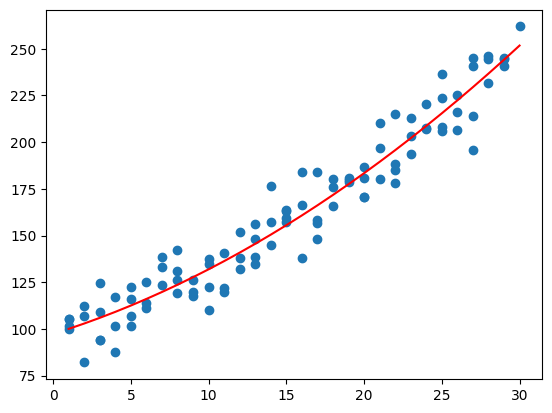

In [ ]:
plt.scatter(gun, Harcama)
plt.plot(gun, linReg2.predict(gun_pol), color = "red")

In [ ]:
linReg2.score(gun_pol, Harcama)

0.9372742300738232

In [ ]:
# 0.9230686703268497 # Linear Regression'da score buydu. Score 1'e ne kadar yakın ise o kadar iyi.

In [ ]:
MAE = mean_absolute_error(y, linReg2.predict(gun_pol))
print(MAE)
MSE = mean_squared_error(y, linReg2.predict(gun_pol))
print(MSE)
RMSE = np.sqrt(MSE)
print(RMSE)

9.248393806066822
129.15157482783772
11.364487442372301


In [ ]:
10.355467888640376
158.40064446527427  # Linear MAE, MSE, RMSE sonuçları
12.585731781079488

In [ ]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

In [ ]:
X = df.drop('sales', axis = 1)
y = df['sales']

In [ ]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
polynomial_converter = PolynomialFeatures(degree = 2, include_bias=False)

In [ ]:
poly_features = polynomial_converter.fit_transform(X)

In [ ]:
poly_features.shape

(200, 9)

In [ ]:
poly_features[0]

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [ ]:
# Bu dizinin 2.dereceden çıktısı
[x1, x2, x3, x1^2, x1*x2, x1*x3, x2^2, x2*x3, x3^2]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train) # Modelimizi oluşturduk.

LinearRegression()

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
model.score(X_test, y_test) # Çok özellikli 2.dereceden polinom algoritması ile en yüksek skoru elde ettik bugüne kadarki.

0.9843529333146783

In [ ]:
MAE = mean_absolute_error(y_test, test_predictions)
print(MAE)
MSE = mean_squared_error(y_test, test_predictions)
print(MSE)
RMSE = np.sqrt(MSE)
print(RMSE)

0.4896798044803838
0.4417505510403753
0.6646431757269274


In [ ]:
df['sales'].mean()

np.float64(14.0225)

* Simple Linear Regression:
    * MAE: 1.213
    * RMSE: 1.516

* Polynomial 2-degree:
    * MAE: 0.4896
    * RMSE: 0.664

In [ ]:
train_rmse_errors = []

test_rmse_errors = []

In [ ]:
for d in range(1, 10):
    polynomial_converter = PolynomialFeatures(degree = d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

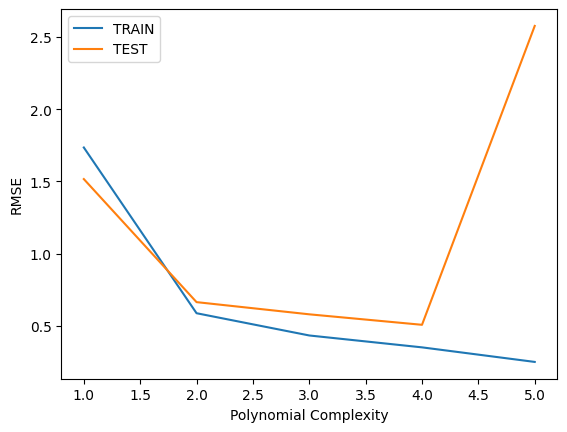

In [ ]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [ ]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias=False)

In [ ]:
final_model = LinearRegression()

In [ ]:
final_model.fit(final_poly_converter.fit_transform(X), y)

LinearRegression()

In [ ]:
import joblib

In [ ]:
joblib.dump(final_model, 'final_model.pkl') # Modelimizi dışarıya aktarmış olduk.

['final_model.pkl']

In [ ]:
joblib.dump(final_poly_converter, 'poly_converter.pkl')

['poly_converter.pkl']

In [ ]:
loaded_model = joblib.load('final_model.pkl')

In [ ]:
loaded_poly = joblib.load('poly_converter.pkl')

In [ ]:
campaign = [[149, 22, 12]]

In [ ]:
campaign_poly = loaded_poly.transform(campaign)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
loaded_model.predict(campaign_poly)

array([14.64501014])

# Ödev

Bulduğunuz bir veri seti ile regresyon modeli geliştirin ve değerlendirin.
(titanic, iris, taxis ve çok kullanılan bir veri seti olmayacak)


kaggle


In [ ]:
x = np.array([105,118,120,126,133,135, 135])
y = np.array([208,220,215,228,228,223,235])
m, b = np.polyfit(x, y, 1)

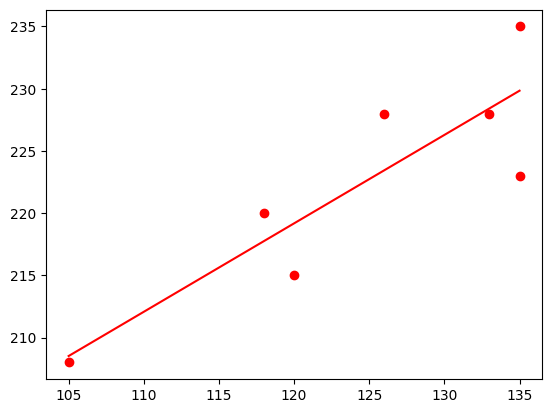

In [ ]:
plt.plot(x, y, "ro")
plt.plot(x, m*x+b, "r")

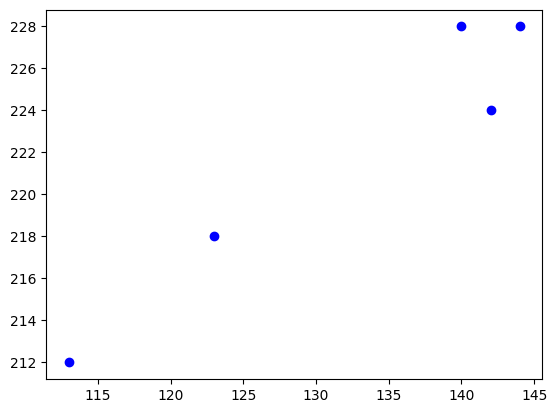

In [ ]:
x2 = np.array([113,123,140,142,144])
y2 = np.array([212,218,228, 224,228])
plt.plot(x2,y2, "bo")

In [ ]:
xt = np.array([105,118,120,126,133,135, 135, 113,123,140,142,144])
yt = np.array([208,220,215,228,228,223,235, 212,218,228, 224,228])

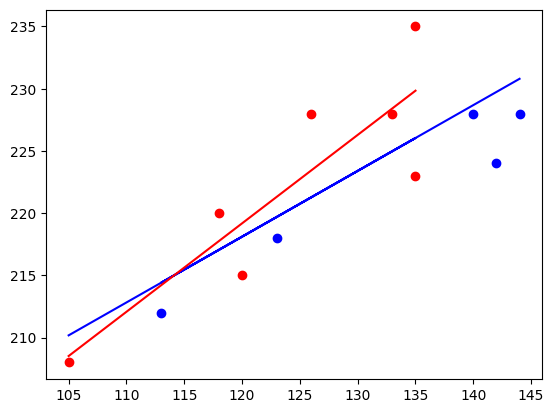

In [ ]:
m2, b2 = np.polyfit(xt,yt, 1)
plt.plot(xt, m2*xt+b2,"b")
plt.plot(x,y, "ro")
plt.plot(x, m*x+b,"r")
plt.plot(x2,y2, "bo")